# 복습문제: 주문서
---
- 1.order_id 컬럼은 숫자의 의미를 가지지 않는 컬럼이기 떄문에 문자형 변경
- 2.가장 많이 주문(횟수)한 item_name과 그 수량을 출력
- 3.item당 주문 총량을 구하고 바형 그래프로 시각화
- 4.item_price를 flot의 형태로 변환
- 5.주문당 평균 계산 금액 출력
- 6.각 아이템의 가격을 출력한 후에 가격 분포 그래프 / 가격 히스토그램 출력
- 7."Chiken Bowl"을 2개 이상 주문한 고객들의 "chiken bowl' 메뉴의 총 주문 수량

In [118]:
import pandas as pd

#tsv파일로드
chipo = pd.read_csv("../csv/num_1/chipotle.tsv", sep="\t")

In [119]:
#1
chipo["order_id"] = chipo["order_id"].astype(str)

# def to_str(x):
#     return str(x)

# chipo["order_id"] = chipo["order_id"].apply(to_str)

In [120]:
#2
item_count = chipo['item_name'].value_counts()   #해당 열에 각 원소가 몇번 있는지
# chipo.groupby("item_name").sum()    #이거는 총 주문량

item_count.head(3)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Name: item_name, dtype: int64

In [121]:
chipo['item_name'].value_counts().index.tolist()[0] #가장 주문횟수가 많은 item_name

'Chicken Bowl'

In [122]:
#3 item_name의 주문 총량을 그래프로
item_quantity = chipo.groupby("item_name").sum()["quantity"]

In [123]:
import matplotlib.pyplot as plt
import numpy as np

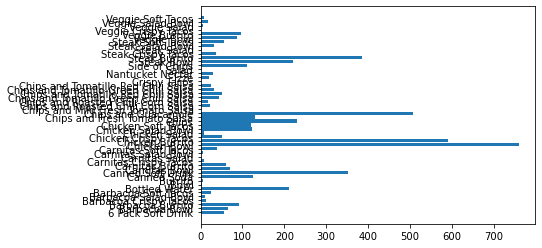

In [124]:
x = item_quantity.index
y = item_quantity

plt.barh(x,y)
plt.show()

> replace는 기본적으로 컬럼에 바로 적용 가능하다. apply 사용 안해도 된다.

In [128]:
# 4.item_price를 flot의 형태로 변환

# case1
def func_replace1(x):
    result = float(x.replace("$", ""))
    return result

chipo["item_price"] = chipo["item_price"].apply(func_replace1)


# case2
# chipo["item_price"] = chipo["item_price"].str.replace("$", "").astype(float)

In [129]:
# 5.주문당 평균 계산 금액 출력
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [136]:
## 6.각 아이템의 가격을 출력한 후에 가격 분포 그래프 / 가격 히스토그램 출력

# 각 아이템의 가격을 출력(여기서 수량이 1개인 데이터를 대상으로!)
chipo_one_item = chipo[chipo["quantity"] == 1]
chipo_one_item
# chipo.query("quantity == 1") #쿼리가 속도가 좀 느림


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [143]:
## item_name을 기준으로 그룹화 하고 item_price의 최솟값을 구하면 아이템당 가격을 추출.
price_per_item  = chipo_one_item.groupby("item_name").min()

# item당 가격이 큰것부터 상위 10개를 출력
price_per_item.sort_values("item_price", ascending=False).head(10)


,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


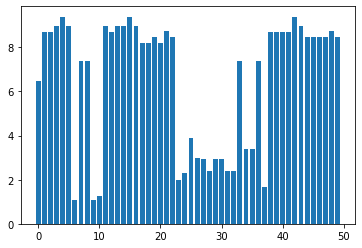

In [150]:
#아이템 가격 분포 그래프(바형그래프)
x = price_per_item.index
x_pos = np.arange(len(x))   #x라벨 만큼 0~n까지의 배열을 만들어줌으로서 x라벨 간결화

y = price_per_item["item_price"]

plt.bar(x_pos,y)
plt.show()

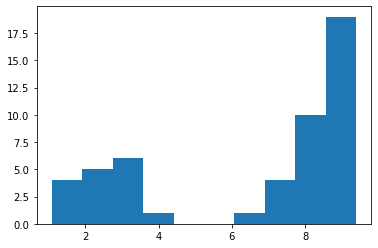

In [151]:
# 히스토그램 출력 -> 아이템 가격을 x축으로하며 가격빈도를 y로
plt.hist(y)
plt.show()

#### \# 7."Chiken Bowl"을 2개 이상 주문한 고객들의 "chiken bowl' 메뉴의 총 주문 수량


In [162]:
# chiken bowl만 출력
chipo_chicken = chipo[chipo["item_name"]=="Chicken Bowl"]
len(chipo_chicken)

726

In [168]:
# order_id를 기준으로 그룹화 하여 주문 수량 합계를 출력
chipo_chicken_odersum = chipo_chicken.groupby("order_id").sum()["quantity"]
len(chipo_chicken_odersum)
    #111회만큼 재주문이 들어왔다.(726에 재주문이 포함됌 -> 같은 oder_id가 존재)

615

In [173]:
# chipo_chicken_odersum[chipo_chicken_odersum >= 2]
chipo_chicken_odersum[chipo_chicken_odersum >= 2].sum()

260